In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


This is the overall dataset where we have 35 columns and 1470 rows i.e.we have 34 features and attrition is our label i.e. target variable. from data we can see there are some columns which have object data type also.Our data problem is classification. we will have to train our model using classification models.

In [3]:
df.shape

(1470, 35)

here also we can see our the total rows and no of columns in the dataset

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


here is overall statstical health of our dataset. I can see the dataset doesn't have any null values. but we will verfiy it with other method also.I can see here mean and std.deviation for each variable. some of our data has categorical values and some have continuous data. like coulumn age daily rate,distance have continuous data and empolyee count job involment these coulumns contains categoriacal data.some columns may have skewness as they have much difference in minimum and maxium value. some columns also have outliers also.

In [5]:
col = df.columns
col

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

I have created here col to store the all columns in dataset.

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

our data does not have any null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.drop_duplicates()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


here we can see which columns have object data and which have numerical data. we will have to convert object data into numerical to process on it. 

In [9]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

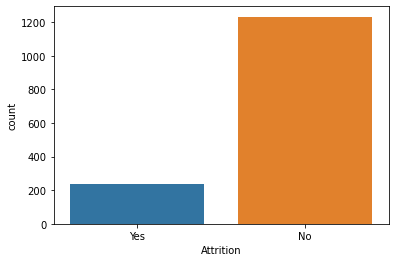

In [10]:
sns.countplot(df['Attrition'])

here we can see the target vairiable Attrition's value counts. our target variable have imbalance value count. we will have to make it balanced to train the better model. these values shows the employees which has stayed and left. 

In [11]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
*********************************************************
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*********************************************************
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*********************************************************
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
*********************************************************
Gender:['Female' 'Male']
Male      882
Female  

here i have printed unique values for each columns which have object data.

In [12]:
df['EmployeeCount'].value_counts()
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

here I can see this two colums and over18 contain only one value count. According to me this colums are of no use. so lets drop the unwanted columns.

In [13]:
df = df.drop(columns =['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis = 1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [14]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


I have converted the object data into numerical using labelencoder

alongwith those three columns  i have removed employee numbers also as these also does not useful.

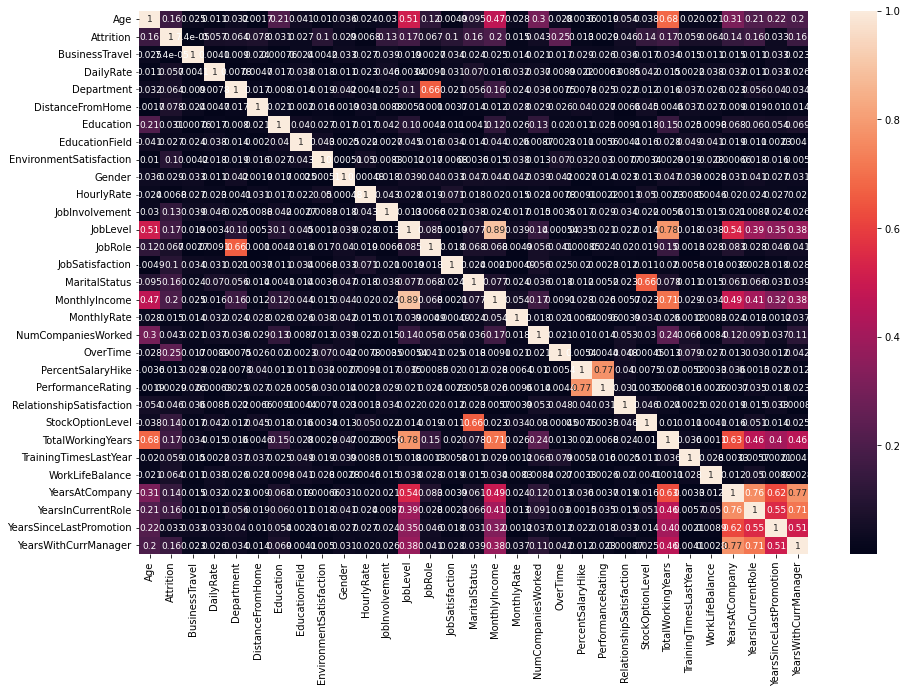

In [15]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

In [16]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,0.018462,-0.011194,...,0.000633,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011194,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599


so i have created heatmap and correlation to view the correlation with features v/s features and feature v/s target. monthly inocme and job level are  highly positively correlated with one another.total working years is alos positively correalted with age,monthly inocome and job level.

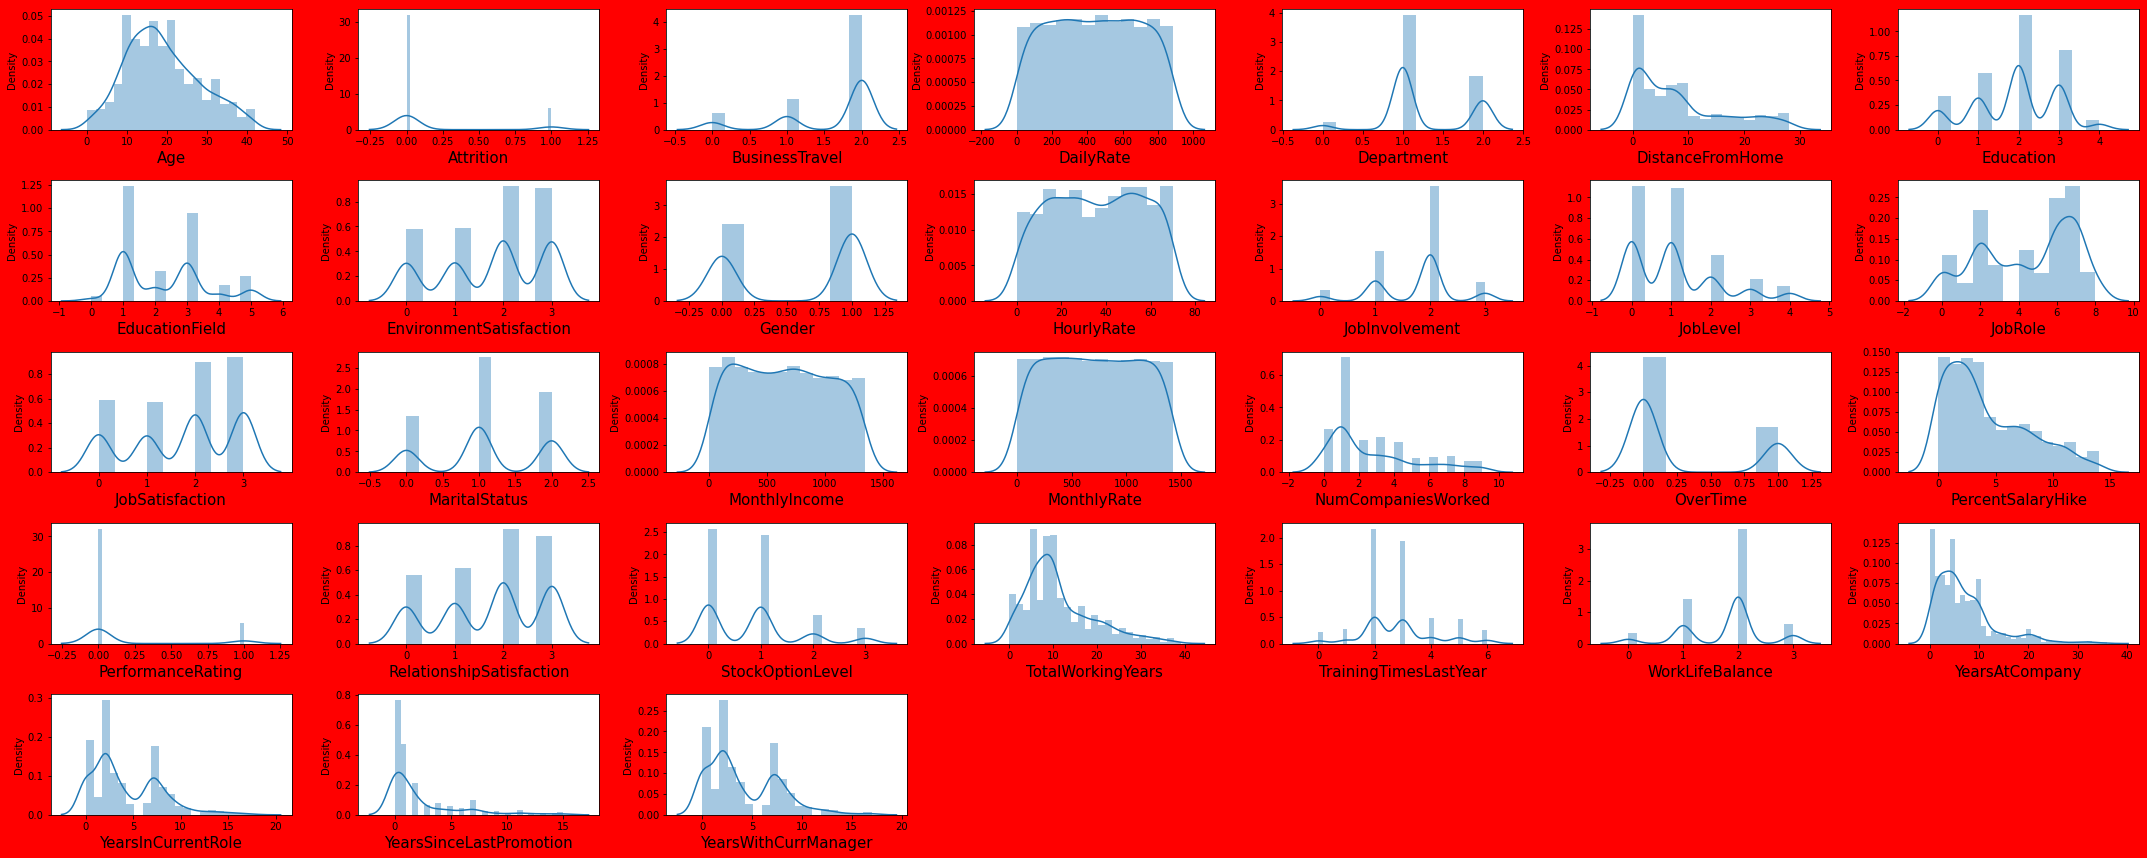

In [17]:
plt.figure(figsize =(30,12),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=35:
        ax = plt.subplot(5,7,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize =15)

    plotnumber+=1
plt.tight_layout()

   

dataframe contain skewness in almost all columns. to build the better model we have to make our data normallay distributed.

# OUTLIERS

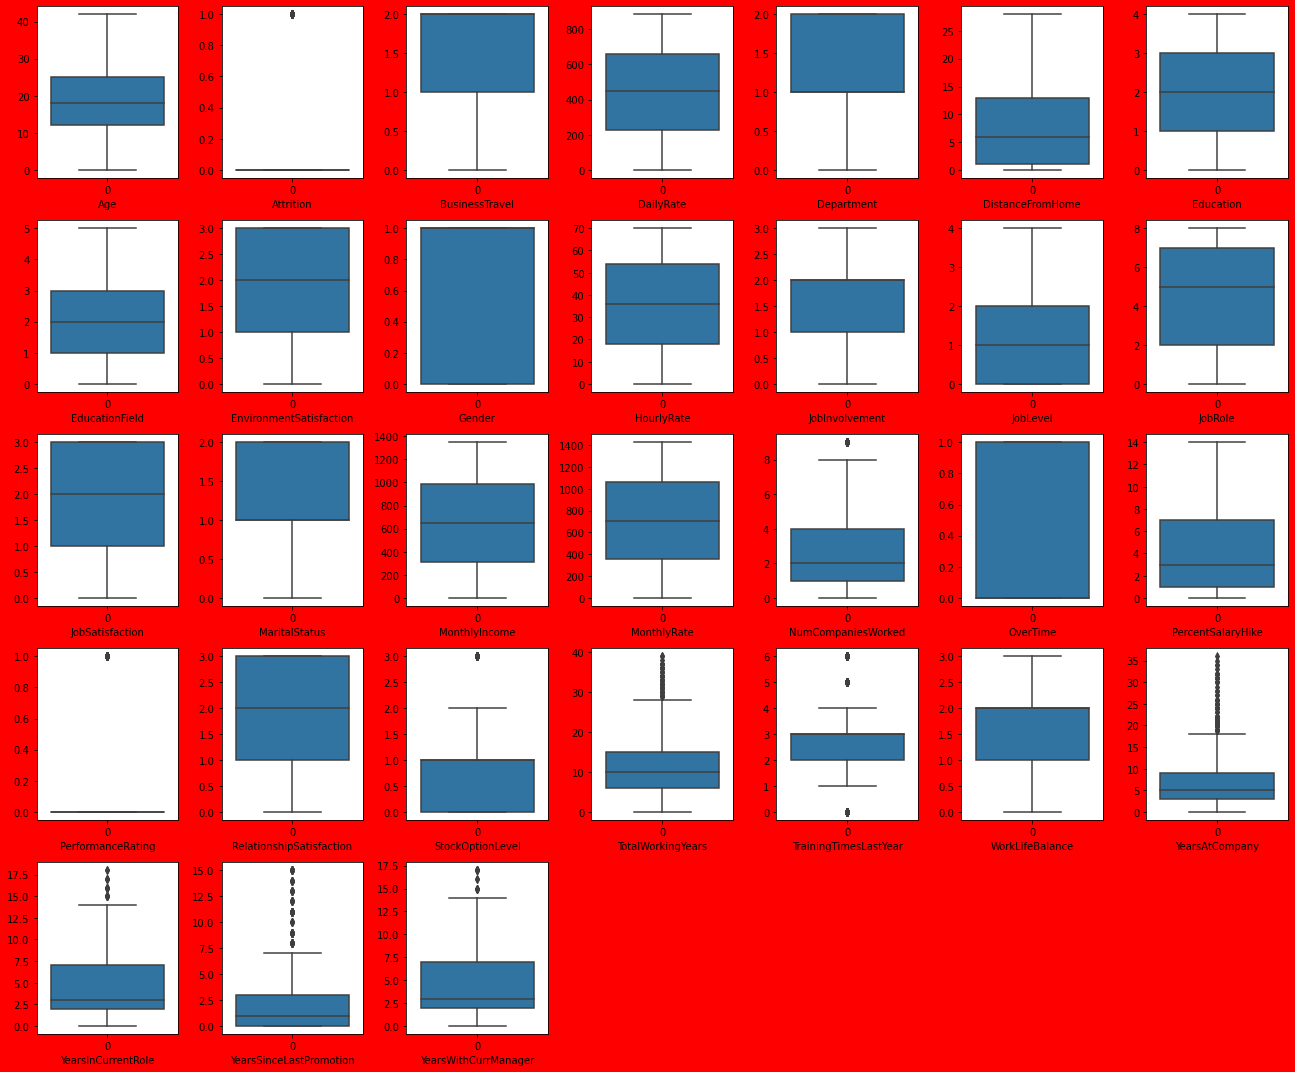

In [18]:
plt.figure(figsize =(18,15),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=35:
        ax = plt.subplot(5,7,plotnumber)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize =10)

    plotnumber+=1
plt.tight_layout()

From above visualisation data has so many outliers in years since promotion, years with curr manager, years in current role and 
in other columns we can see some columns doesn't have any outliers.

In [19]:
from scipy.stats import zscore
import numpy as np
z =np.abs(zscore(df))
thresholds = 3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [20]:
df_new=df[(z<3).all(axis =1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


here I have used z_score method to remove the outliers in the dataset.

In [21]:
X= df_new.drop(columns= ['Attrition'])
y = df_new['Attrition']

In [22]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,...,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,2,1,31,...,1,3,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,3,1,62,...,0,1,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,...,0,2,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,1,10,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,2,1,11,...,0,2,1,17,3,2,5,2,0,3
1466,21,2,327,1,5,0,3,3,1,12,...,0,0,1,9,5,2,7,7,1,7
1467,9,2,39,1,3,2,1,1,1,57,...,1,1,1,6,0,2,6,2,0,3
1468,31,1,579,2,1,2,3,3,1,33,...,0,3,0,17,3,1,9,6,0,8


In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA()
pca.fit(X_scaled)

PCA()

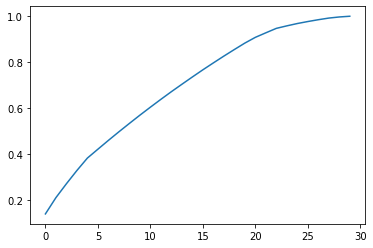

In [27]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [28]:
pca = PCA(n_components=24)
new_pcomp = pca.fit_transform(X_scaled)
X_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15',
                                             'PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24'])
X_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,0.140521,0.835345,-2.130087,-1.408138,0.172135,-2.693828,-0.359143,1.133775,-1.095674,2.629014,...,-1.741279,-0.726936,0.325456,1.464021,-0.057218,-1.285603,1.419141,-0.525624,-0.968606,0.288346
1,1.075673,-0.941773,2.666163,-1.615405,0.116724,0.464062,0.364977,-1.327188,-0.926197,-1.684420,...,-0.555298,-1.794527,0.035950,0.257026,0.136846,-0.357872,0.241099,-1.595108,1.104651,0.169405
2,-2.780679,1.198228,-0.079705,0.025492,-1.470220,-0.045304,1.619536,1.441129,1.821949,0.723636,...,-0.981747,0.721317,1.621788,-0.165336,0.211656,0.355424,1.508012,-0.119063,-0.086843,0.277709
3,-0.575944,-0.809494,-1.056646,0.526055,-0.470831,-1.273426,1.334164,0.282358,-0.093654,-0.345124,...,-1.037149,0.162384,0.201446,0.111539,-0.934655,1.190410,0.056497,0.231252,0.461183,-0.909234
4,-1.814179,0.832096,-0.233435,1.215641,-0.924704,1.087242,-0.053958,-0.477202,0.783155,-0.386659,...,0.957510,-1.076926,-1.671235,1.332272,-0.853864,-1.414243,2.036879,0.483929,-1.144622,0.200680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.557216,0.774682,0.839172,0.765492,-0.332671,-0.718654,0.264974,-0.661604,0.903535,-0.358788,...,1.175933,0.924371,-1.043831,-0.119589,1.196170,-0.606396,0.673419,-0.672069,0.023048,0.113056
1383,1.443515,0.178780,0.406055,0.929597,-1.097074,2.725440,2.009993,-1.091465,-0.834903,0.515769,...,0.024095,-1.134617,-0.439627,-0.109403,0.644733,1.024877,0.867016,-0.546655,-0.853196,0.437222
1384,-0.897251,-0.030839,2.350697,-1.006974,0.413626,-1.319443,-1.483741,1.271201,-0.196994,-0.487216,...,-0.278446,0.695676,-0.581679,1.152618,1.113500,0.893829,-0.775222,0.557965,-0.904507,0.079567
1385,1.552750,-0.288864,-1.239820,-0.588970,0.277466,-0.081361,0.442361,0.023438,1.277730,-0.608190,...,-0.718366,-2.169751,0.367534,-0.332261,0.183741,0.203663,-0.727884,-1.800005,0.750160,-0.509458


In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
SMOTE()

SMOTE()

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X_comp,y)

In [32]:
from collections import Counter
ove_smp = SMOTE(0.75)
x_train_s,y_train_s = ove_smp.fit_resample(x_train,y_train)
print('the number of the classes before fit {}'.format(Counter(y_train)))
print('the number of the classes after fit {}'.format(Counter(y_train_s)))

the number of the classes before fit Counter({0: 866, 1: 174})
the number of the classes after fit Counter({0: 866, 1: 649})


 I have applied here smote method to balance the counts in target variable. 

In [33]:
x_train,y_train = x_train_s,y_train_s

 I have reassinged the balance data set.

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# MODEL EVALUATION

In [35]:

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_comp,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i},the accuracy score is:{accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the accuracy score is:{accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the accuracy score is:0.872858431018936
At random state 0,the accuracy score is:0.8812949640287769


At random state 1,the accuracy score is:0.8773669972948602
At random state 1,the accuracy score is:0.8669064748201439


At random state 2,the accuracy score is:0.872858431018936
At random state 2,the accuracy score is:0.8705035971223022


At random state 3,the accuracy score is:0.8782687105500451
At random state 3,the accuracy score is:0.8776978417266187


At random state 4,the accuracy score is:0.8836789900811542
At random state 4,the accuracy score is:0.8669064748201439


At random state 5,the accuracy score is:0.8836789900811542
At random state 5,the accuracy score is:0.8201438848920863


At random state 6,the accuracy score is:0.8629395852119026
At random state 6,the accuracy score is:0.9064748201438849


At random state 7,the accuracy score is:0.8755635707844905
At random state 7,the accuracy score is:0.8705035971223022


At random state 8,the accuracy score is:0.

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_comp,y,random_state =92,test_size = 0.20)


In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
pred_test = lr.predict(x_test)

In [39]:
print(accuracy_score(y_test,pred_test))

0.8992805755395683


In [40]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       241
           1       0.68      0.46      0.55        37

    accuracy                           0.90       278
   macro avg       0.80      0.71      0.75       278
weighted avg       0.89      0.90      0.89       278



In [41]:
print(confusion_matrix(y_test,pred_test))

[[233   8]
 [ 20  17]]


In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.7733812949640287
[[205  36]
 [ 27  10]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       241
           1       0.22      0.27      0.24        37

    accuracy                           0.77       278
   macro avg       0.55      0.56      0.55       278
weighted avg       0.79      0.77      0.78       278



In [43]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.8812949640287769
[[241   0]
 [ 33   4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       241
           1       1.00      0.11      0.20        37

    accuracy                           0.88       278
   macro avg       0.94      0.55      0.57       278
weighted avg       0.90      0.88      0.84       278



In [44]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.8884892086330936
[[239   2]
 [ 29   8]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       241
           1       0.80      0.22      0.34        37

    accuracy                           0.89       278
   macro avg       0.85      0.60      0.64       278
weighted avg       0.88      0.89      0.86       278



In [45]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(confusion_matrix(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.8561151079136691
[[221  20]
 [ 20  17]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       241
           1       0.46      0.46      0.46        37

    accuracy                           0.86       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.86      0.86      0.86       278



In [46]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(confusion_matrix(y_test,prebt))
print(classification_report(y_test,prebt))


Accuracy 0.8597122302158273
[[231  10]
 [ 29   8]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       241
           1       0.44      0.22      0.29        37

    accuracy                           0.86       278
   macro avg       0.67      0.59      0.61       278
weighted avg       0.83      0.86      0.84       278



In [50]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X_comp,y,cv=6)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.866609444195651


In [51]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt,X_comp,y,cv=3)
print("Cross Validation Score for Decision Tree Classification Model is:-",scr.mean())

Cross Validation Score for Decision Tree Classification Model is:- 0.7728908960010471


In [63]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rt,X_comp,y,cv=3)
print("Cross Validation Score for Random Forest Classification Model is:-",scr.mean())

Cross Validation Score for Random Forest Classification Model is:- 0.8485939306673648


In [55]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(st,X_comp,y,cv=3)
print("Cross Validation Score for Support Vector Classifier Model is:-",scr.mean())

Cross Validation Score for Support Vector Classifier Model is:- 0.8615825019712707


In [57]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(at,X_comp,y,cv=4)
print("Cross Validation Score for Ada Boost Classifier Model is:-",scr.mean())

Cross Validation Score for Ada Boost Classifier Model is:- 0.8406739851076943


In [58]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(bt,X_comp,y,cv=5)
print("Cross Validation Score for Bagging Classifier Model is:-",scr.mean())

Cross Validation Score for Bagging Classifier Model is:- 0.8442796665194919


from all the above observations I can see the Random Forest Classifier is giving me the very  good accuracy and cross validation score  as compared to other models . In random forest classifier the confusion matrix report the shows the false positive prediction rate less which is 1  and which is good. The Model accuracy for random forest classifier is 88% and cross validation sore is 85% means my model is not overfitting. This would be my best fit model for this project. So I am continuing with Random Forest Classifier. I will check the Auc_Roc curve to get the True Positive rate. Now i am applying here hyperparatmeter tuning to increase the accuracy.

# Hyper Parameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8,9]}


In [65]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [66]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [67]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto')

In [68]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8705035971223022

# AUC_ROC CURVE PLOT

<function matplotlib.pyplot.show(close=None, block=None)>

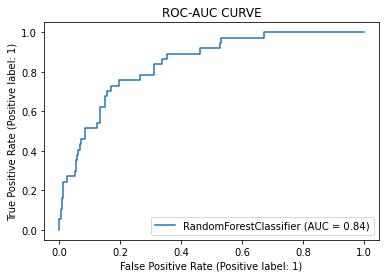

In [69]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

# Hyperprameter Tuning For SVC:-

In [80]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1,2.3,4.5,6.7],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'max_iter':[4,5,6,7,8,9],}


In [81]:
GCV = GridSearchCV(SVC(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 0.1, 'kernel': 'rbf', 'max_iter': 9}

In [82]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [83]:
GCV.best_estimator_

SVC(C=0.1, max_iter=9)

In [84]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7841726618705036

In [ ]:
Here RandomForest is giving best accuracy and true negative rate for it is also 0. So,I am finaalisng RandomForest Is my final model.

In [85]:
import joblib
joblib.dump(rt,'HR Attrion Model.pkl')

['HR Attrion Model.pkl']